# **Image Classification of Rock-Paper-Scissors Pictures using Convolutional Neural Network (CNN)**

`@knightbearr`

## **Import Module 1**

import module yang diperlukan untuk penelitian.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import matplotlib.image as mpimg
import os
from keras.preprocessing import image
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Upload Data**

upload data yang ingin diteliti.

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-27 05:55:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.28MB/s    in 61s     

2021-07-27 05:56:35 (5.06 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## **Since we want to use the Dataset, we must extract them first using *zipfile* library yang sudah di siapkan di bagian Import Modul, dan pastikan kita sudah meng-importnya.** 

Algoritmanya sebagai berikut :

1. tampung tmp/file sementara dataset tersebut kedalam variable (***local_zip***)
2. tampung file/sementara dataset/rps-cv-images kedalam variable (***base_dir***)
3. extract zipfile menggunakan funsgi *ZipFile* yang tersedia pada modul zipfile yang sudah kita import, lalu masukan dua argument, yang pertama file sementara yang sudah kita tampung pada variable **local_zip** dan yang kedua itu 'r' untuk membaca file tersebut
4. gunakan fungsi ***extractall()*** untuk mengekstrak semua file di dalam file 
5. dan menutup file dengan memanggil fungsi ***close()***, karena jika tidak memanggil fungsi close, catatan penting tidak akan ditulis, info lebih lanjutnya tentang module zipfile bisa dilihat disini https://docs.python.org/3/library/zipfile.html
6. buat variable base_dir untuk menampung tmp image/ data sementara image
7. buat variable train_dir dan menggunakan module os.path.join() dan beri 2 argumen, argumen pertama itu base_dir, dan kedua 'train' dan untuk yang validation itu sama, tetapi argumen terakhir menggunakan 'val'

In [4]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('/tmp')
zip_extract.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

## **Check Direktori**

chech direktori menggunakan fungsi ***listdir()*** yang berada pada library ***os*** 

In [5]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [6]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'README_rpc-cv-images.txt', 'paper', 'rock']

## **Data Processing dengan Image Augmentation yang menjadi kriteria submission**

Algoritmanya sebagai berikut

1. buat variable ***train_datagen***, dan gunakan fungsi ***ImageDataGenerator***.
2. masukan ***rescale*** untuk men scale data.
3. masukan ***zoom_range*** untuk men zoom data.
4. masukan ***rotation_range*** untuk mengatur rotasi.
5. masukan ***horizontal_flip*** untuk membalikkan gambar/foto.
6. masukan ***fill_mode*** untuk memasukan mode yang kita inginkan, disini saya menggunakan mode ***wrap/membungkus***.
7. masukan ***validation_split*** untuk mensplit dataset sebesar 40%.
8. masukan ***height_shift_range*** untuk mengatur rentang pergeseran ketinggian.
 

In [7]:
train_datagen = ImageDataGenerator(
    rescale=(1./225),
    zoom_range=0.2,
    rotation_range=25,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=0.4,
    height_shift_range=2)

## **Menyiapkan Data Untuk Model**

Sebelum pindah ke pemodelan data, kita harus mengambil jalur ke direktori target dan menghasilkan kumpulan data tambahan.

Algoritma nya sebagai berikut :

1. Buat variable ***train_generator*** dan ***validation_generator*** yang menampung variable ***train_datagen*** dan ***validation_generator***  yang telah kita buat sebelumnya, lalu gunakan fungsi ***flow_flow_directory***.
2. Masukan file ***base_dir*** untuk jalur ke direktori target.
3. Masukan ***target_size*** untuk merubah semua resolusi gambar.
4. Masukan ***shuffle*** untuk mengatur acak data.
5. Masukan ***color_mode*** untuk mengatur warna data.
6. Masukan ***class_mode*** categorical untuk menentukan jenis label array, kita menggunakan categorical karena kita mempunyai 3 kelas gambar.
7. Masukan ***interpolation*** untuk meresampling citra gambar jika ukuran target berbeda dari gambar yang dimuat.
8. Masukan ***batch_size_data*** untuk ukuran kumpulan data.
9. Masukan ***subset*** training karena variable ini ingin supaya kita menampung data pelatihan.

In [8]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical',
    interpolation='nearest',
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical',
    interpolation='nearest',
    batch_size=32,
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## **Buat CNN Arsitektur**

karena kita ingin membuat model untuk mengklasifikasikan gambar maka kita akan membuat CNN dua dimensi (2D).

kita menggunakan ***tf.keras.models.Sequantial()***, karena ini merupakan kriteia submission yang telah diberikan.

In [9]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')])

## **Compile Model**

Karena model yang kita compile masuk kedalam klasifikasi multi-kelas, jadi kita harus menggunakan binary ***categorical_cossentrpy***.

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'])

## **Dan Latih Model Kita**

gunakan fungsi fit untuk melatih model kita

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=10, # Atur Epoch sesuai keinginan anda
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2)

Epoch 1/10
25/25 - 31s - loss: 0.1491 - accuracy: 0.9538 - val_loss: 0.1351 - val_accuracy: 0.9625
Epoch 2/10
25/25 - 30s - loss: 0.1413 - accuracy: 0.9532 - val_loss: 0.2517 - val_accuracy: 0.8938
Epoch 3/10
25/25 - 31s - loss: 0.1583 - accuracy: 0.9413 - val_loss: 0.1525 - val_accuracy: 0.9438
Epoch 4/10
25/25 - 31s - loss: 0.1068 - accuracy: 0.9663 - val_loss: 0.1118 - val_accuracy: 0.9750
Epoch 5/10
25/25 - 31s - loss: 0.0951 - accuracy: 0.9700 - val_loss: 0.1465 - val_accuracy: 0.9625
Epoch 6/10
25/25 - 30s - loss: 0.0885 - accuracy: 0.9662 - val_loss: 0.1799 - val_accuracy: 0.9500
Epoch 7/10
25/25 - 30s - loss: 0.1246 - accuracy: 0.9506 - val_loss: 0.1206 - val_accuracy: 0.9563
Epoch 8/10
25/25 - 31s - loss: 0.1160 - accuracy: 0.9613 - val_loss: 0.1324 - val_accuracy: 0.9500
Epoch 9/10
25/25 - 30s - loss: 0.1333 - accuracy: 0.9545 - val_loss: 0.2198 - val_accuracy: 0.9250
Epoch 10/10
25/25 - 31s - loss: 0.0953 - accuracy: 0.9625 - val_loss: 0.0624 - val_accuracy: 0.9875


## **Visualize Model training History**

Setelah menerapkan augmentasi data dan Dropout, overfitting lebih sedikit daripada sebelumnya, dan akurasi pelatihan dan validasi lebih selaras.

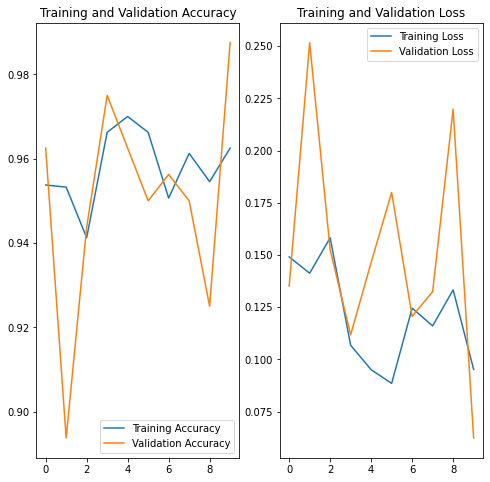

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Final**

upload gambar menggunakan code seperti berikut.

Algoritmanya sebagai berikut :

1. Saya membuat variable uploaded untuk mengambil data/file, dan gunakan fungsi ***upload()*** untuk mengupload gambar yang ingin kita prediksi.
2. Saya membuat perulangan dengan iterasi fn di variables uploaded yang saya buat sebelumnya, dan hanya mengambil Keys nya saja.
3. Saya membuat variable img_src untuk menampung data image, dan saya menggunakan target_size yang sama dengan data train_generator sebelumnya.
4. Saya membuat variable imgplot untuk menunjukan gambar/foto.
5. Saya membuat variable x untuk memasukan gambar kedalam array.
6. Saya juga membuat variable yang sama dengan sebelumnya untuk menambah dimensi menggunakan library numpy.
7. Saya juga membuat variable images untuk me vstack atau untuk dapat menerima lebih dari 2 array dalam argumen urutan.
8. Saya juga membuat variable classes untuk menampung model predict, dan memasukan argumen variable images, dan juga batch_size sebesar 15.
9. Saya juga memasukan fungsi ***print()*** untuk memanggil fn
10. saya membuat conditional if, elif statment untuk memprediksi gambar yang ditunjukkan.

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img_src = image.load_img(path, target_size=(100, 150))
    imgplot = plt.imshow(img_src)
    x = image.img_to_array(img_src)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0, 0] == 1:
        print('rock')
    elif classes[0, 1] == 1:
        print('paper')
    elif classes[0, 2] == 1:
        print('scissors')